## EDA with Python and applying Logistic Regression
## Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

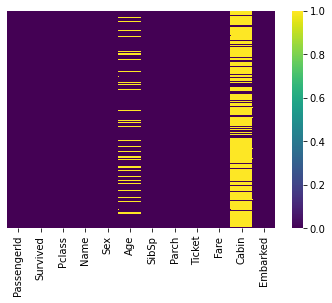

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

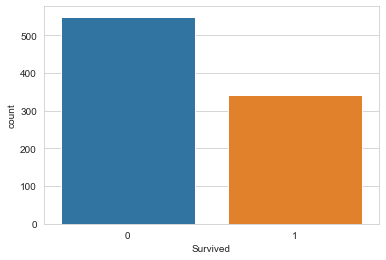

In [6]:
sns.set_style('whitegrid')
sns.countplot('Survived',data=train)

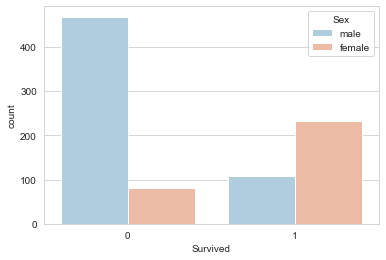

In [7]:
sns.set_style('whitegrid')
sns.countplot('Survived',data=train,hue='Sex',palette='RdBu_r')

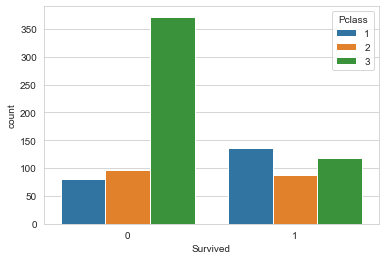

In [8]:
sns.set_style('whitegrid')
sns.countplot('Survived',data=train,hue='Pclass')

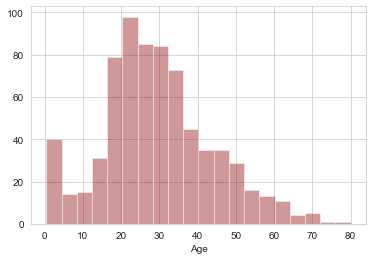

In [9]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=20)

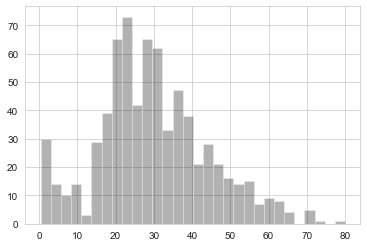

In [10]:
train['Age'].hist(bins=30,color='black',alpha=0.3)

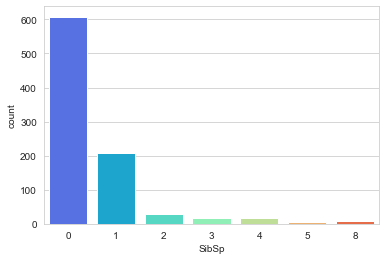

In [11]:
sns.countplot(x='SibSp',data=train,palette='rainbow')

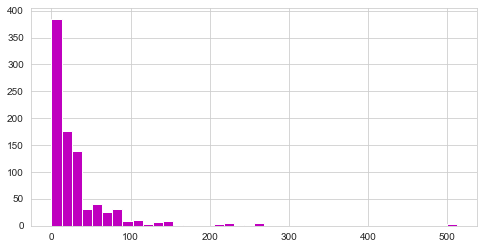

In [12]:
train['Fare'].hist(color='m',bins=40,figsize=(8,4))

## Data Cleaning

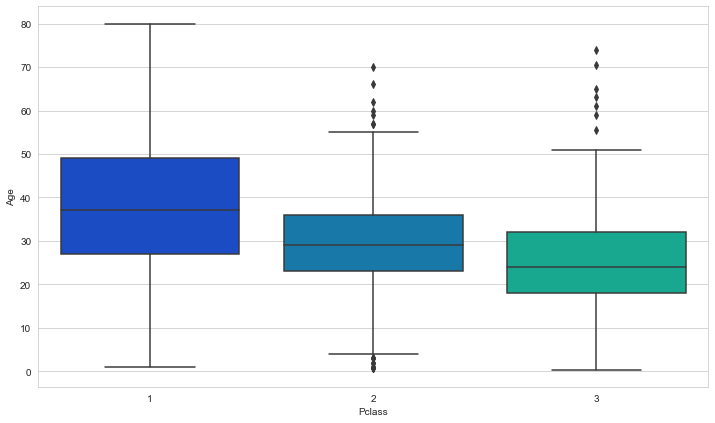

In [13]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [15]:
## Apply impute_age function
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

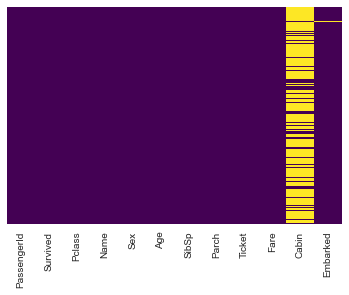

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
train['Cabin'].isnull().sum()

687

In [18]:
train.drop(['Cabin'],axis=1,inplace=True)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting Categorical Feature

In [20]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [21]:
train['Embarked'].isnull().sum()

2

In [22]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [24]:
print(sex.dtypes)
print("----")
print(embark.dtypes)

male    uint8
dtype: object
----
Q    uint8
S    uint8
dtype: object


In [25]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [27]:
## Concat 'train', 'sex' and 'embark' dummies
train = pd.concat([train,sex,embark],axis=1)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [29]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
male             uint8
Q                uint8
S                uint8
dtype: object

## Logistic Regression
## train_test_split

In [30]:
train.drop('Survived',axis = 1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [31]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(train.drop('Survived',axis=1),
                                                train['Survived'],test_size=0.30,
                                                random_state=101)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

F:\ancnd\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
predictions = log_model.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [42]:
accuracy = confusion_matrix(y_test,predictions)

In [43]:
accuracy

array([[133,  21],
       [ 42,  72]], dtype=int64)

In [45]:
acc_score = accuracy_score(y_test,predictions)

In [46]:
acc_score

0.7649253731343284